# Peaksearch class example

Basic example showing the peaksearch class capabilities.

In [1]:
from nasagamma import spectrum as sp
import pandas as pd
from nasagamma import peaksearch as ps
import matplotlib.pyplot as plt
%matplotlib inline

# dataset 1
file = "data/gui_test_data_cebr.csv"
df = pd.read_csv(file)

# instantiate a Spectrum object
spect = sp.Spectrum(counts=df["counts"])

We need to provide reference values for the fwhm at a specific channel, which varies depending on the detector resolution.

In [2]:
# Required input parameters (in channels)
fwhm_at_0 = 1
ref_fwhm = 20
ref_x = 420

We then instantiate a peaksearch object which runs a spectral deconvolution technique based on the code written in: https://github.com/lbl-anp/becquerel. Note that we need to pass in a spectrum object.

In [3]:
# instantiate a peaksearch object
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=5, method="km")

The kernel used for the deconvolution technique mentioned above looks as follows:

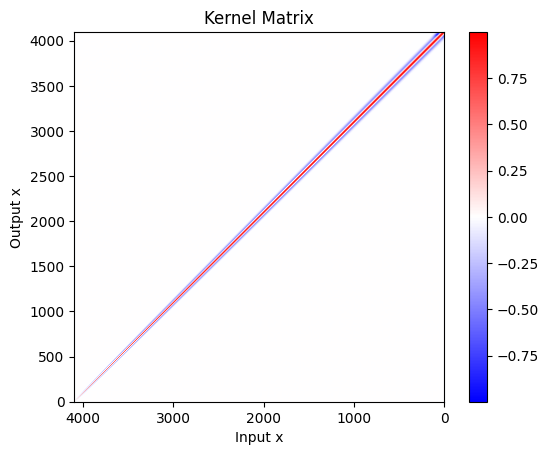

In [4]:
search.plot_kernel()

This kernel matrix takes into account the variation of the FWHM as a function of energy. Note how the "noise" is separated from the "signal". We can now plot the different components of the spectrum:


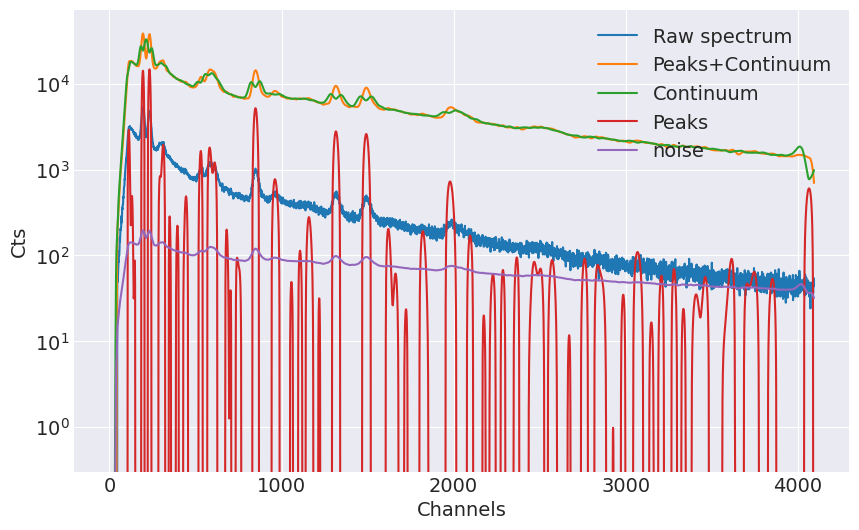

In [5]:
search.plot_components()

The detected peaks with the specified min_snr value is as follows.

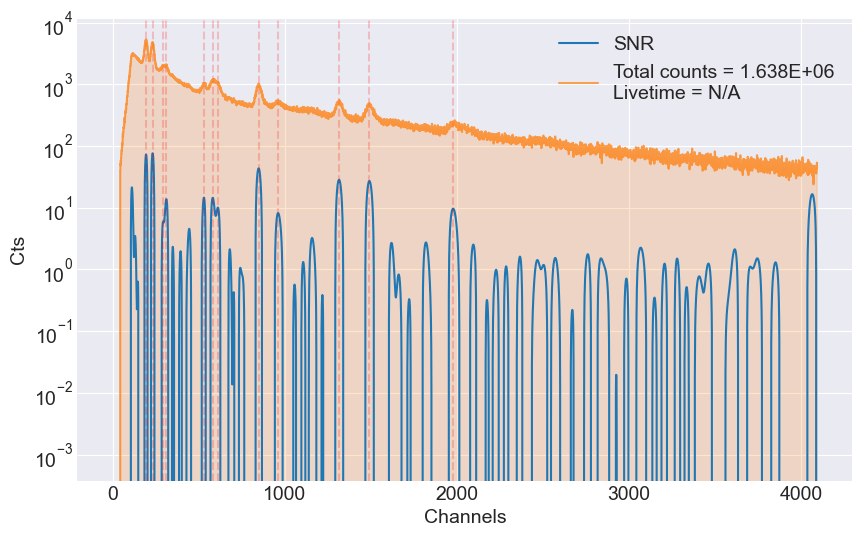

In [6]:
search.plot_peaks()

This algorithm for peak finding is robust. However, it can be slow for spectra with more than 8k channels. In this case, we can either restrict the range or use the built-in peak finding algorithm from SciPy or both.

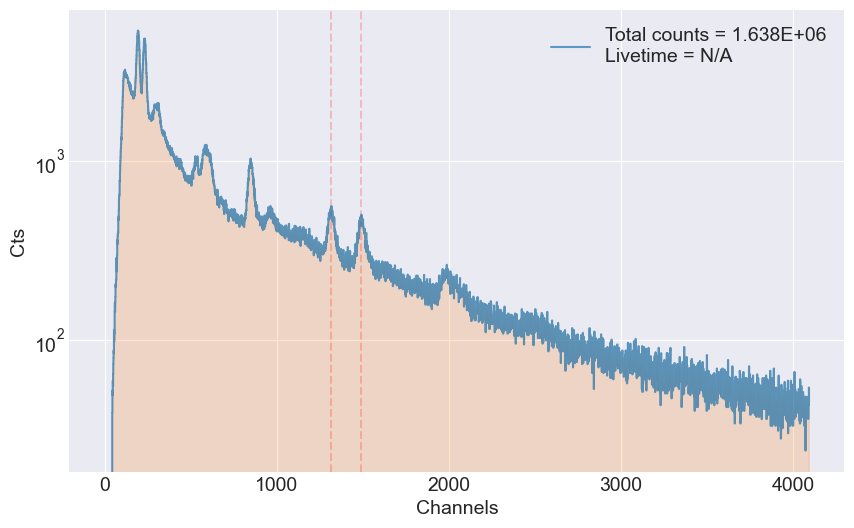

In [10]:
# instantiate a peaksearch object with predetermined range
search2 = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=10, xrange=[1200,1600], method="km")
search2.plot_peaks(snrs="off")

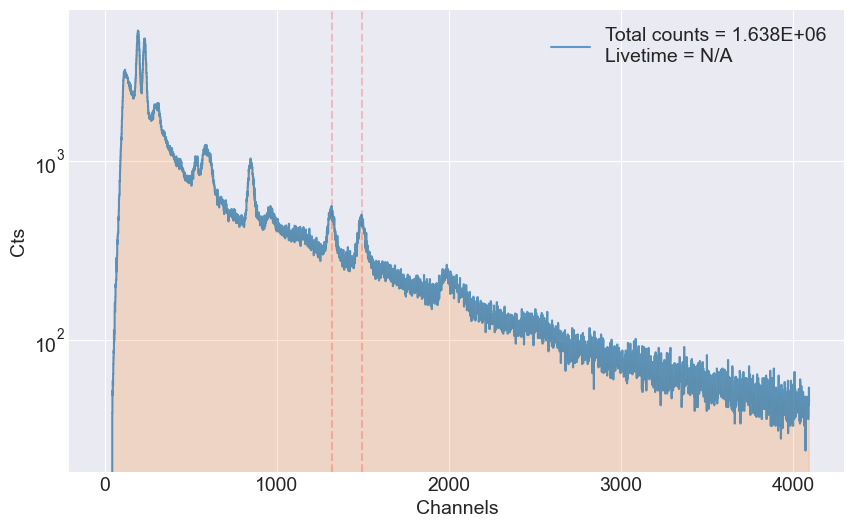

In [9]:
# Do the same but with the SciPy peak finding algorithm
search3 = ps.PeakSearch(
    spectrum=spect,
    ref_x=420,
    ref_fwhm=15,
    fwhm_at_0=1,
    min_snr=10,
    xrange=[1200, 1600],
    method="scipy",
)
search3.plot_peaks(snrs="off")